In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

C:\Users\tsk_sato\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


# 次元削減の例

In [5]:
X = [[90,60,70,20,70],
    [20,60,80,90,30],
    [10,20,60,30,40],
    [70,50,90,80,70],
    [40,70,50,80,60]]
pca = PCA(n_components=2)
pca.fit(X).transform(X)

array([[ 59.32108998,  15.44300187],
       [-41.22696173, -20.12759392],
       [-27.0299157 ,  52.30107735],
       [ 18.66524242, -28.01523025],
       [ -9.72945497, -19.60125505]])

# PCAの分散最大化基準

In [6]:
np.random.seed(seed=1)

x = np.random.normal(0, 1, (1, 30))
y = 0.7*x+np.random.normal(0, 0.5, (1, 30))

xy = np.vstack((x, y)).T
pca = PCA(n_components=2)
pca.fit(xy)
pca.components_

array([[-0.81694764, -0.57671184],
       [-0.57671184,  0.81694764]])

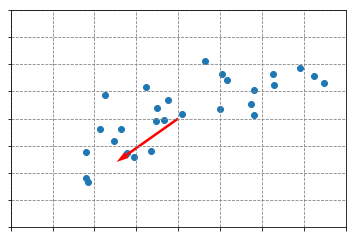

In [7]:
plt.figure()
plt.scatter(x, y)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid(which='major',color='gray',linestyle='--')
plt.grid(which='minor',color='gray',linestyle='--')
# plt.xticks([])
# plt.yticks([])
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.quiver(0,0,*pca.components_[0],color="r",scale_units="xy", scale=1)
# plt.quiver(0,0,*pca.components_[1],color="r",scale_units="xy", scale=1)
plt.show()

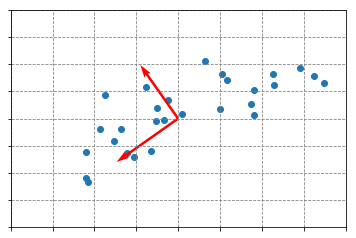

In [8]:
plt.figure()
plt.scatter(x, y)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid(which='major',color='gray',linestyle='--')
plt.grid(which='minor',color='gray',linestyle='--')
# plt.xticks([])
# plt.yticks([])
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.quiver(0,0,*pca.components_[0],color="r",scale_units="xy", scale=1)
plt.quiver(0,0,*pca.components_[1],color="r",scale_units="xy", scale=1)
plt.show()

## winequality white

In [2]:
# ファイル読み込み
in_file = '../data/winequality-white.csv'
df = pd.read_csv(in_file, header=0, index_col=None, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(4898, 12)

In [4]:
target = "quality"
X = df.drop(target, axis=1)
y = df[target]

In [5]:
# データの標準化
scaler = StandardScaler(with_std=True)
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA()
pca.fit(X_scaled)
# 寄与率
print(pca.explained_variance_ratio_) 

[ 0.29293217  0.14320363  0.11106103  0.09259294  0.08848496  0.08534014
  0.06605437  0.05448713  0.03764942  0.02631701  0.00187719]


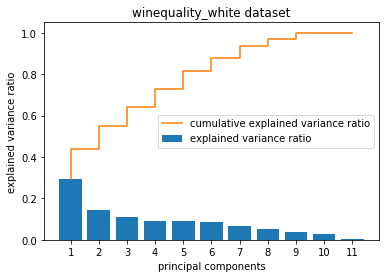

In [7]:
# 寄与率と累積寄与率の可視化
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, label="explained variance ratio")
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_),
         label="cumulative explained variance ratio", color='#ff7f00')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.title("winequality_white dataset")
plt.xlabel("principal components")
plt.ylabel("explained variance ratio")
plt.legend()
plt.show()

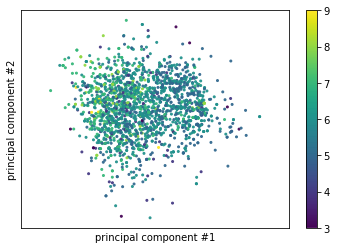

In [8]:
# 2次元プロット
n_sample = 2000
X_reduced = pca.transform(X_scaled)
#plt.figure(figsize=(8,6))
plt.gca().set_aspect('equal', adjustable='datalim')  # 縦横比をそろえる
plt.scatter(X_reduced[:n_sample,0], X_reduced[:n_sample,1], c=y[:n_sample], alpha=.9, s=4)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("principal component #1")
plt.ylabel("principal component #2")
plt.show()

## digits

In [9]:
digits = datasets.load_digits()

In [10]:
digits.data.shape

(1797, 64)

In [11]:
X = digits.data
y = digits.target

In [12]:
# データの標準化
scaler = StandardScaler(with_std=True)
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
# X_scaled = X

In [13]:
pca = PCA()
pca.fit(X_scaled)
# 寄与率
print(pca.explained_variance_ratio_) 

[  1.20339161e-01   9.56105440e-02   8.44441489e-02   6.49840791e-02
   4.86015488e-02   4.21411987e-02   3.94208280e-02   3.38938092e-02
   2.99822101e-02   2.93200255e-02   2.78180546e-02   2.57705509e-02
   2.27530332e-02   2.22717974e-02   2.16522943e-02   1.91416661e-02
   1.77554709e-02   1.63806927e-02   1.59646017e-02   1.48919119e-02
   1.34796957e-02   1.27193137e-02   1.16583735e-02   1.05764660e-02
   9.75315947e-03   9.44558990e-03   8.63013827e-03   8.36642854e-03
   7.97693248e-03   7.46471371e-03   7.25582151e-03   6.91911245e-03
   6.53908536e-03   6.40792574e-03   5.91384112e-03   5.71162405e-03
   5.23636803e-03   4.81807586e-03   4.53719260e-03   4.23162753e-03
   4.06053070e-03   3.97084808e-03   3.56493303e-03   3.40787181e-03
   3.27835335e-03   3.11032007e-03   2.88575294e-03   2.76489264e-03
   2.59174941e-03   2.34483006e-03   2.18256858e-03   2.03597635e-03
   1.95512426e-03   1.83318499e-03   1.67946387e-03   1.61236062e-03
   1.47762694e-03   1.35118411e-03

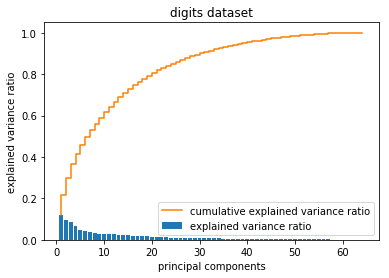

In [14]:
# 寄与率と累積寄与率の可視化
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, label="explained variance ratio")
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_),
         label="cumulative explained variance ratio", color='#ff7f00')
# plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.title("digits dataset")
plt.xlabel("principal components")
plt.ylabel("explained variance ratio")
plt.legend()
plt.show()

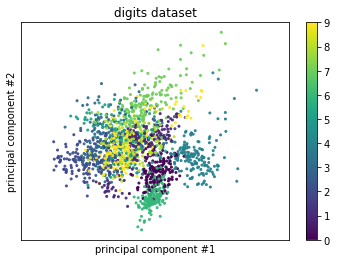

In [15]:
# 2次元プロット
n_sample = 2000
X_reduced = pca.transform(X_scaled)
#plt.figure(figsize=(8,6))
plt.gca().set_aspect('equal', adjustable='datalim')  # 縦横比をそろえる
plt.scatter(X_reduced[:n_sample,0], X_reduced[:n_sample,1], c=y[:n_sample], alpha=.9, s=4)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title("digits dataset")
plt.xlabel("principal component #1")
plt.ylabel("principal component #2")
plt.show()

## breast_cancer

In [16]:
# ファイル読み込み# ファイル読み 
in_file = '../data/breast_cancer.csv'
df = pd.read_csv(in_file, header=0, index_col='Sample code number', sep=',').sample(frac=1)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1334667,1,1,1,1,2,1,1,1,1,2
1156948,3,1,1,2,2,1,1,1,1,2
1168736,5,6,6,2,4,10,3,6,1,4
1230175,10,10,10,3,10,10,9,10,1,4
1196263,4,1,1,1,2,1,1,1,1,2


In [17]:
# データセットの作成
target = 4
target_col = 'Class'
df = df.replace('?', np.nan)
df = df.dropna(how='any', axis=1)

In [18]:
X = df.drop(target_col, axis=1)
y = (df[target_col]==target).astype(np.int32)

In [19]:
# データの標準化
scaler = StandardScaler(with_std=True)
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
# 寄与率
print(pca.explained_variance_ratio_) 

[ 0.65982301  0.09339484  0.06735342  0.05104741  0.04695641  0.03728969
  0.03283384  0.01130138]


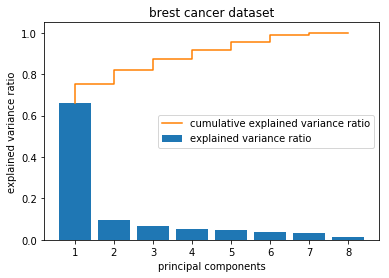

In [20]:
# 寄与率と累積寄与率の可視化
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, label="explained variance ratio")
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_),
         label="cumulative explained variance ratio", color='#ff7f00')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.title("brest cancer dataset")
plt.xlabel("principal components")
plt.ylabel("explained variance ratio")
plt.legend()
plt.show()

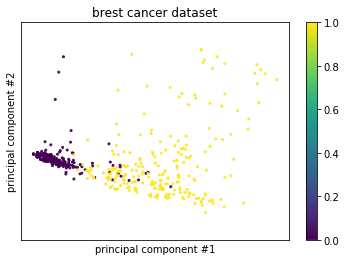

In [21]:
# 2次元プロット
n_sample = 2000
X_reduced = pca.transform(X_scaled)
#plt.figure(figsize=(6,4))
plt.gca().set_aspect('equal', adjustable='datalim')  # 縦横比をそろえる
plt.scatter(X_reduced[:n_sample,0], X_reduced[:n_sample,1], c=y[:n_sample], alpha=.9, s=4)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title("brest cancer dataset")
plt.xlabel("principal component #1")
plt.ylabel("principal component #2")
plt.show()